In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [52]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [4 7 5 7 3 0 8 3 0 4]


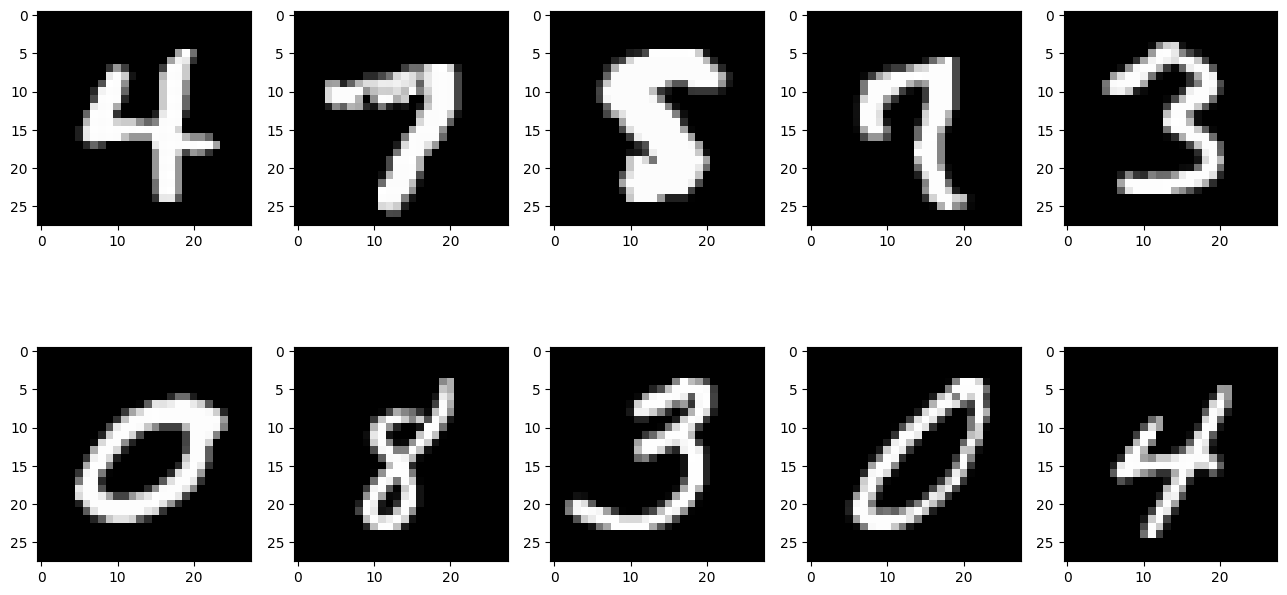

In [53]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [54]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [55]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 60,970
Trainable params: 60,970
Non-trai

Train the model

In [57]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2965 - accuracy: 0.9106
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1266 - accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0941 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9846
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.037

Plot the loss and accuracy graphs

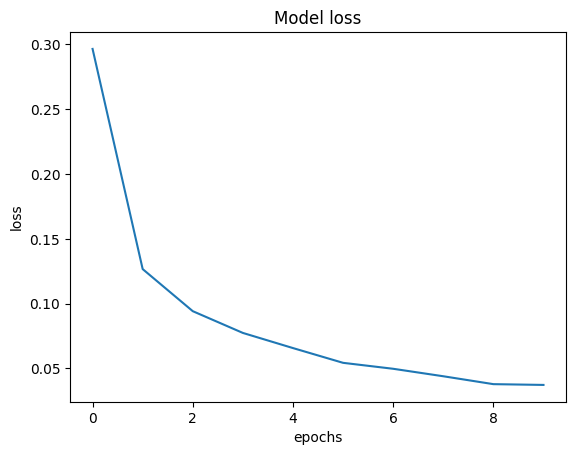

In [58]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

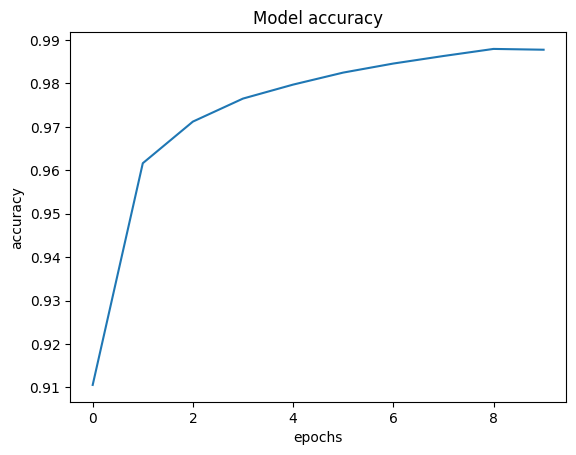

In [59]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [60]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9742
Loss of the Test dataset is: 0.1013084203004837
Accuracy of the test dataset is: 0.9742000102996826


In [61]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 0s 1ms/step


<Axes: >

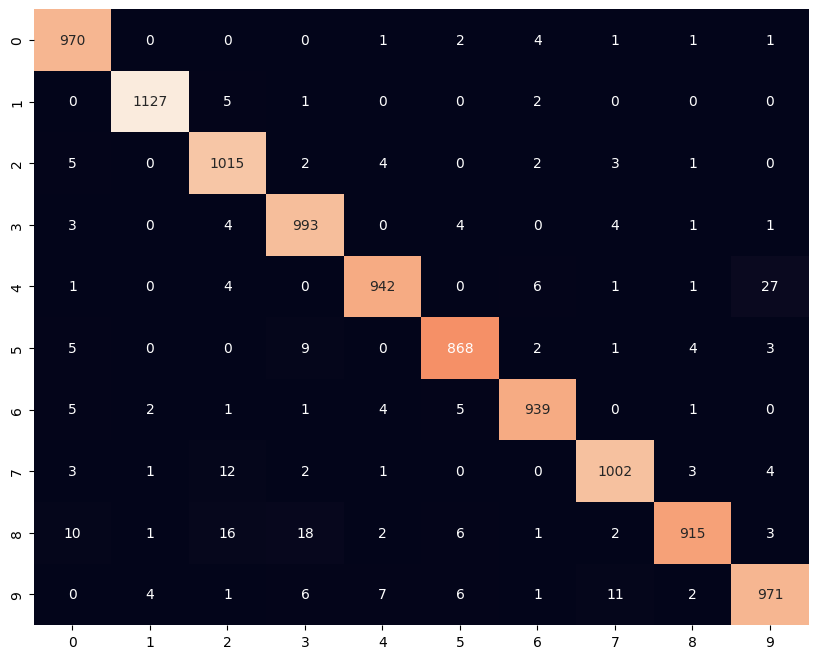

In [63]:
predicted_probabilities = model.predict(new_test_data)


predicted_classes = np.argmax(predicted_probabilities, axis=1)

cm = confusion_matrix(test_target, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

